In [1]:
from __future__ import division
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier
import sklearn as sk
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing
import warnings # to silence convergence warnings
import scipy.linalg as lng 
# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default
from sklearn.preprocessing import StandardScaler

In [2]:
case_01 = pd.read_csv('../case1Data.txt', sep = ",", engine='python')
case_01_new = pd.read_csv('../case1Data_XNew.txt',sep=',',engine='python')

In [3]:
case_01 = case_01.replace(" NaN",np.nan)
case_01 = case_01.replace("NaN ",np.nan)
case_01 = case_01.replace("NaN",np.nan)

case_01_new = case_01_new.replace(" NaN",np.nan)
case_01_new = case_01_new.replace("NaN ",np.nan)
case_01_new = case_01_new.replace("NaN",np.nan)

In [4]:
print(case_01.shape)
sum(case_01.isnull().sum()) # 15.5 % is NaN

(100, 101)


1564

In [5]:
print(case_01_new.shape)
sum(case_01_new.isnull().sum()) # 15% is NaN

(1000, 100)


14872

In [6]:
y = case_01[['y']]
x_100 = case_01[case_01.columns[1:]]
x_new = case_01_new

In [7]:
x_new = x_new.rename(columns={'x_ 1':' x_ 1'})

In [8]:
y = y.astype('float')
x_100_num = x_100[x_100.columns[:95]].astype('float')
x_100_cat = x_100[x_100.columns[95:]]
x_new_num = x_new[x_new.columns[:95]].astype('float')
x_new_cat = x_new[x_new.columns[95:]]

In [9]:
x_100_cat = pd.get_dummies(x_100_cat)
x_new_cat = pd.get_dummies(x_new_cat)

In [10]:
X_100 = pd.concat([x_100_num,x_100_cat],axis=1)
X_new = pd.concat([x_new_num,x_new_cat],axis=1)

In [11]:
X_100

,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,x_10,...,C_ 4_ G,C_ 4_ H,C_ 4_ I,C_ 4_ J,C_ 4_ K,C_ 5_ G,C_ 5_ H,C_ 5_ I,C_ 5_ J,C_ 5_ K
0,-7.518161,5.423677,11.810360,-19.076321,-7.018273,23.841339,1.050206,3.132453,4.403462,NaN,...,0,0,0,1,0,0,0,0,0,1
1,-6.370690,7.792366,11.858663,NaN,-15.420530,21.683970,1.057192,2.559764,NaN,-4.286417,...,0,0,1,0,0,0,0,1,0,0
2,-4.229569,2.756115,12.446836,-17.567113,-12.984783,NaN,2.484515,NaN,1.852533,NaN,...,0,0,0,1,0,1,0,0,0,0
3,-10.487072,1.460685,9.307533,-21.306282,-19.824912,NaN,-0.442587,0.743039,-0.376102,-7.535363,...,0,0,1,0,0,0,0,0,0,0
4,-13.066517,4.812794,10.641948,-17.691825,NaN,19.057921,1.900578,6.133609,-0.771247,NaN,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-3.746623,NaN,14.898749,-17.262103,-15.406944,25.744304,4.157661,6.127105,2.839280,-3.862928,...,0,0,0,0,0,0,1,0,0,0
96,-4.311540,7.208115,NaN,-17.232457,-11.173426,24.660276,NaN,8.513152,4.327020,1.556960,...,0,0,0,1,0,0,0,0,0,1
97,-15.662503,0.521416,7.628422,-18.867588,-20.632873,20.905762,-3.530738,0.965488,NaN,-12.522048,...,1,0,0,0,0,0,0,0,0,1
98,-7.338365,1.597154,12.151154,NaN,NaN,23.185303,3.751106,6.357028,5.208797,NaN,...,0,1,0,0,0,0,0,0,0,0


In [12]:
from sklearn.impute import KNNImputer

Y = y.copy()
imputer = KNNImputer(n_neighbors=5)
# X_train_im = imputer.fit_transform(X_train)
# X_test_im = imputer.fit_transform(X_test)
# Y_train_im = imputer.fit_transform(Y_train)
# Y_test_im = imputer.fit_transform(Y_test)
X_100_im = imputer.fit_transform(X_100)
X_new_im = imputer.fit_transform(X_new)
Y_im = imputer.fit_transform(Y)

In [13]:
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler
scaler = StandardScaler()
normalizer = Normalizer()
minmax = MinMaxScaler()

In [14]:
# x_100_num = x_100[x_100.columns[:95]]
# x_new_num = x_new[x_new.columns[:95]]

In [15]:
# x_100_norm = scaler.fit_transform(x_100_num)
# x_new_norm = scaler.fit_transform(x_new_num)
# y_norm = scaler.fit_transform(y)
X_100_im = scaler.fit_transform(X_100_im)
X_new_im = scaler.fit_transform(X_new_im)
Y_im = scaler.fit_transform(Y_im)

# Y = pd.DataFrame(y_norm, columns=y.columns)
# x_100_norm = pd.DataFrame(x_100_norm,columns=x_100_num.columns)
# x_new_norm = pd.DataFrame(x_new_norm, columns=x_new_num.columns)

In [16]:
Y = pd.DataFrame(Y_im, columns=y.columns)
X_100_im = pd.DataFrame(X_100_im,columns=X_100.columns)
X_new_im = pd.DataFrame(X_new_im, columns=X_new.columns)

In [17]:
X_100_im = pd.concat([X_100_im[X_100_im.columns[:95]],X_100[X_100.columns[95:]]],axis=1)
X_new_im = pd.concat([X_new_im[X_new_im.columns[:95]],X_new[X_new.columns[95:]]],axis=1)

In [18]:
X_100_im

,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,x_10,...,C_ 4_ G,C_ 4_ H,C_ 4_ I,C_ 4_ J,C_ 4_ K,C_ 5_ G,C_ 5_ H,C_ 5_ I,C_ 5_ J,C_ 5_ K
0,0.139623,-0.024081,-0.287400,-0.749598,2.563731,0.112890,-0.695872,-0.978454,0.446914,-0.155799,...,0,0,0,1,0,0,0,0,0,1
1,0.521796,0.852721,-0.269173,0.214636,-0.364717,-0.687669,-0.693391,-1.216331,0.156034,-0.082874,...,0,0,1,0,0,0,0,1,0,0
2,1.234909,-1.011515,-0.047228,-0.209057,0.484217,0.216626,-0.186388,0.207981,-0.316536,-0.384464,...,0,0,0,1,0,1,0,0,0,0
3,-0.849190,-1.491036,-1.231831,-1.548286,-1.899781,-0.929465,-1.226131,-1.970940,-0.983528,-1.189108,...,0,0,1,0,0,0,0,0,0,0
4,-1.708290,-0.250208,-0.728295,-0.253724,0.267751,-1.662147,-0.393809,0.268130,-1.101789,-0.495064,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.395757,0.596025,0.877991,-0.099814,-0.359982,0.819045,0.407935,0.265428,-0.021219,0.061319,...,0,0,0,0,0,0,1,0,0,0
96,1.207608,0.636453,0.734619,-0.089196,1.115531,0.416782,0.679633,1.256515,0.424036,1.906738,...,0,0,0,1,0,0,0,0,0,1
97,-2.572899,-1.838719,-1.865437,-0.674838,-2.181381,-0.976448,-2.323081,-1.878542,-1.635694,-2.887026,...,1,0,0,0,0,0,0,0,0,1
98,0.199506,-1.440520,-0.158803,-0.752081,-0.217638,-0.130553,0.263522,0.360931,0.687937,-1.166984,...,0,1,0,0,0,0,0,0,0,0


In [19]:
X_new_im

,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,x_10,...,C_ 4_ G,C_ 4_ H,C_ 4_ I,C_ 4_ J,C_ 4_ K,C_ 5_ G,C_ 5_ H,C_ 5_ I,C_ 5_ J,C_ 5_ K
0,0.603183,-0.348157,-0.157956,0.023242,0.782429,0.057399,0.901999,0.813957,-1.099433,0.429073,...,0,0,0,1,0,0,0,0,0,0
1,0.529743,0.221794,0.215412,0.859129,-0.316671,-0.299691,-2.237444,-0.907848,-0.534953,0.449382,...,0,0,0,0,0,0,1,0,0,0
2,-0.153574,-1.536028,0.384680,-0.777352,-0.509342,-1.248098,-0.381093,-0.373965,-0.030607,-0.997959,...,0,1,0,0,0,0,0,0,0,1
3,-1.781554,-1.028324,-0.546568,-2.125219,-1.064066,-1.015656,-1.646661,-0.992843,-0.891378,-0.221903,...,0,0,0,0,1,0,0,0,1,0
4,-0.171393,0.144079,0.140109,1.591057,0.065593,0.098127,1.235434,-1.137633,1.370971,-0.072238,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.151421,0.576943,0.698374,-1.204681,-0.817906,-1.124081,-0.069606,-0.447816,-1.592549,-0.516340,...,0,0,1,0,0,0,0,0,0,0
996,0.099112,-0.144170,0.005245,-0.395742,-0.267240,-0.087371,0.036260,0.122243,-0.113835,1.218936,...,1,0,0,0,0,1,0,0,0,0
997,0.207096,-0.680459,-0.392612,-0.373861,-0.240817,-0.604363,0.475336,-1.280206,-0.368557,-0.263202,...,0,1,0,0,0,0,0,0,1,0
998,-1.085691,-0.879935,0.385569,-0.026679,1.520878,-0.902571,-0.222001,-0.628103,-0.203540,-0.161850,...,1,0,0,0,0,1,0,0,0,0


In [20]:
Y

,y
0,-0.460145
1,-0.848546
2,-0.779722
3,0.385431
4,0.749012
...,...
95,0.054923
96,-0.326107
97,2.165849
98,-0.917749


In [21]:
from sklearn.model_selection import train_test_split
X_train_im, X_test_im, Y_train_im, Y_test_im = train_test_split(
    X_100_im, Y, test_size = 0.25,random_state=42)

# KNN regressor

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k = 5
knn = KNeighborsRegressor(n_neighbors=k,weights='distance')
knn.fit(X_train_im, Y_train_im)

y_pred = knn.predict(X_test_im)

rmse_test = np.sqrt(mean_squared_error(Y_test_im, y_pred))
rmse_train = np.sqrt(mean_squared_error(Y_train_im, knn.predict(X_train_im)))
print("Root Mean squared error for train set:",rmse_train)
print("Root Mean squared error for test set:",rmse_test)

Root Mean squared error for train set: 7.605455308989097e-08
Root Mean squared error for test set: 0.9574192579302692


## KNN regressor with GridSearchCV

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors':range(1,20)
}

knn_grid = GridSearchCV(knn,param_grid,cv=5,
                        scoring='neg_root_mean_squared_error'
                        )
knn_grid.fit(X_train_im,Y_train_im)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(weights='distance'),
             param_grid={'n_neighbors': range(1, 20)},
             scoring='neg_root_mean_squared_error')

In [24]:
print(knn_grid.best_params_)
print(-knn_grid.best_score_)
knn_grid.best_estimator_


{'n_neighbors': 7}
0.8735357016106636


KNeighborsRegressor(n_neighbors=7, weights='distance')

In [25]:
knn_grid.fit(X_train_im,Y_train_im)
y_hat = knn_grid.predict(X_test_im)
rmse_test_cv = np.sqrt(mean_squared_error(Y_test_im,y_hat))
rmse_train_cv = np.sqrt(mean_squared_error(Y_train_im,knn_grid.predict(X_train_im)))

print("Root Mean squared error for train set after CV:",rmse_train_cv)
print("Root Mean squared error for test set after CV:",rmse_test_cv)

Root Mean squared error for train set after CV: 9.474742915917388e-08
Root Mean squared error for test set after CV: 0.9875145164799809


## Nested KNN

In [26]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, cross_validate

knn_ = KNeighborsRegressor(weights='distance')

cv_in = KFold(n_splits=5, shuffle=True,random_state=42)
cv_out = KFold(n_splits=10, shuffle=True, random_state=42)

nested_knn_grid = GridSearchCV(knn_,param_grid=param_grid,cv=cv_in)

nested_score = -cross_val_score(nested_knn_grid, X_100_im,
                               Y_im,cv=cv_out,scoring='neg_mean_squared_error')

root_nested_score = np.sqrt(nested_score)
root_nested_score_min = np.min(root_nested_score)
print("The best score:",root_nested_score_min)

The best score: 0.6255245622229855


# Decision Tree regressor

In [27]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(X_train_im,Y_train_im)
y_hat = dtree.predict(X_test_im)

mse = mean_squared_error(Y_test_im,y_hat)
rmse_test = np.sqrt(mse)

rmse_train = np.sqrt(mean_squared_error(Y_train_im,dtree.predict(X_train_im)))

print("Root Mean squared error for train set:",rmse_train)
print("Root Mean squared error for test set:",rmse_test)

Root Mean squared error for train set: 0.0
Root Mean squared error for test set: 1.132670054081637


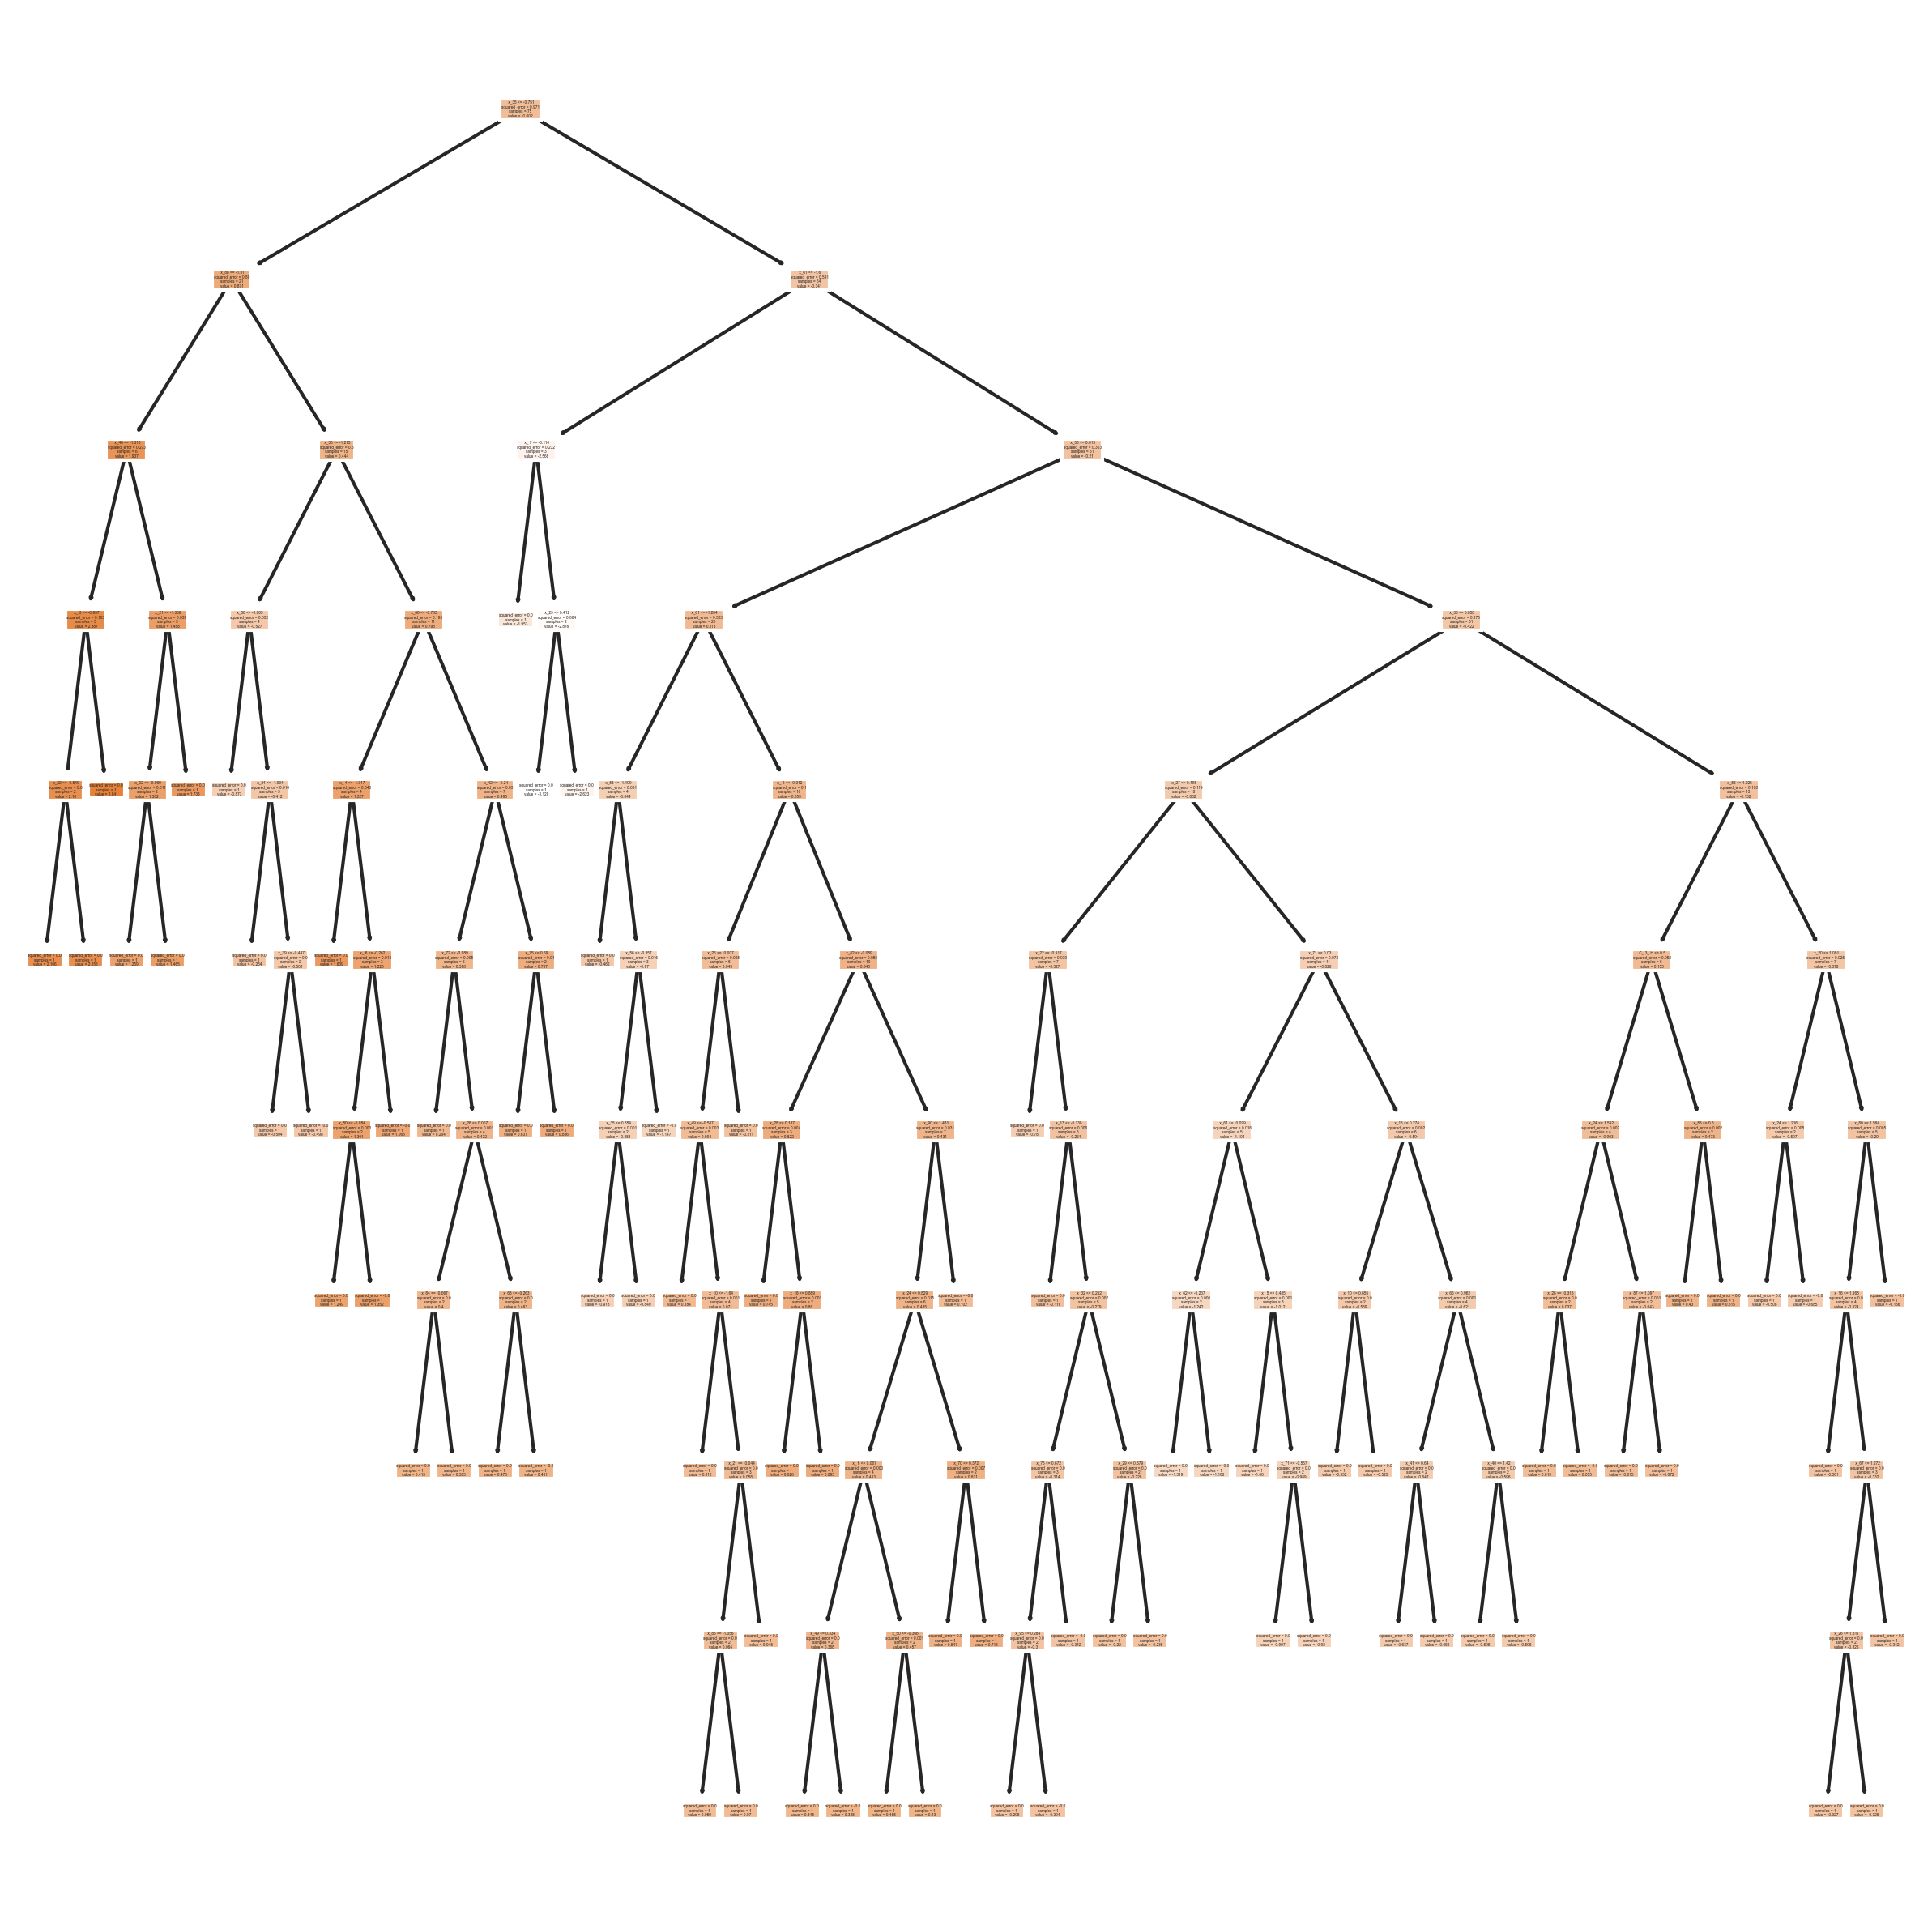

In [28]:
feature_names = X_100.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(dtree,
               feature_names = feature_names,
               filled = True);

## decision tree regressor with GridSearchCV

In [29]:
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeRegressor()

param_grid = {
    'max_depth':range(1,10),
    'min_samples_leaf': np.array([10,20,30]),
}
cv_grid = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                       cv = 10, scoring = 'neg_mean_squared_error',
                       verbose=2, n_jobs=-1)

# Fit the grid search model
cv_grid.fit(X_train_im, Y_train_im)

print(cv_grid.best_params_)
print(-cv_grid.best_score_)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
{'max_depth': 3, 'min_samples_leaf': 10}
0.6805176575288417


In [30]:
cv_grid.best_estimator_

DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)

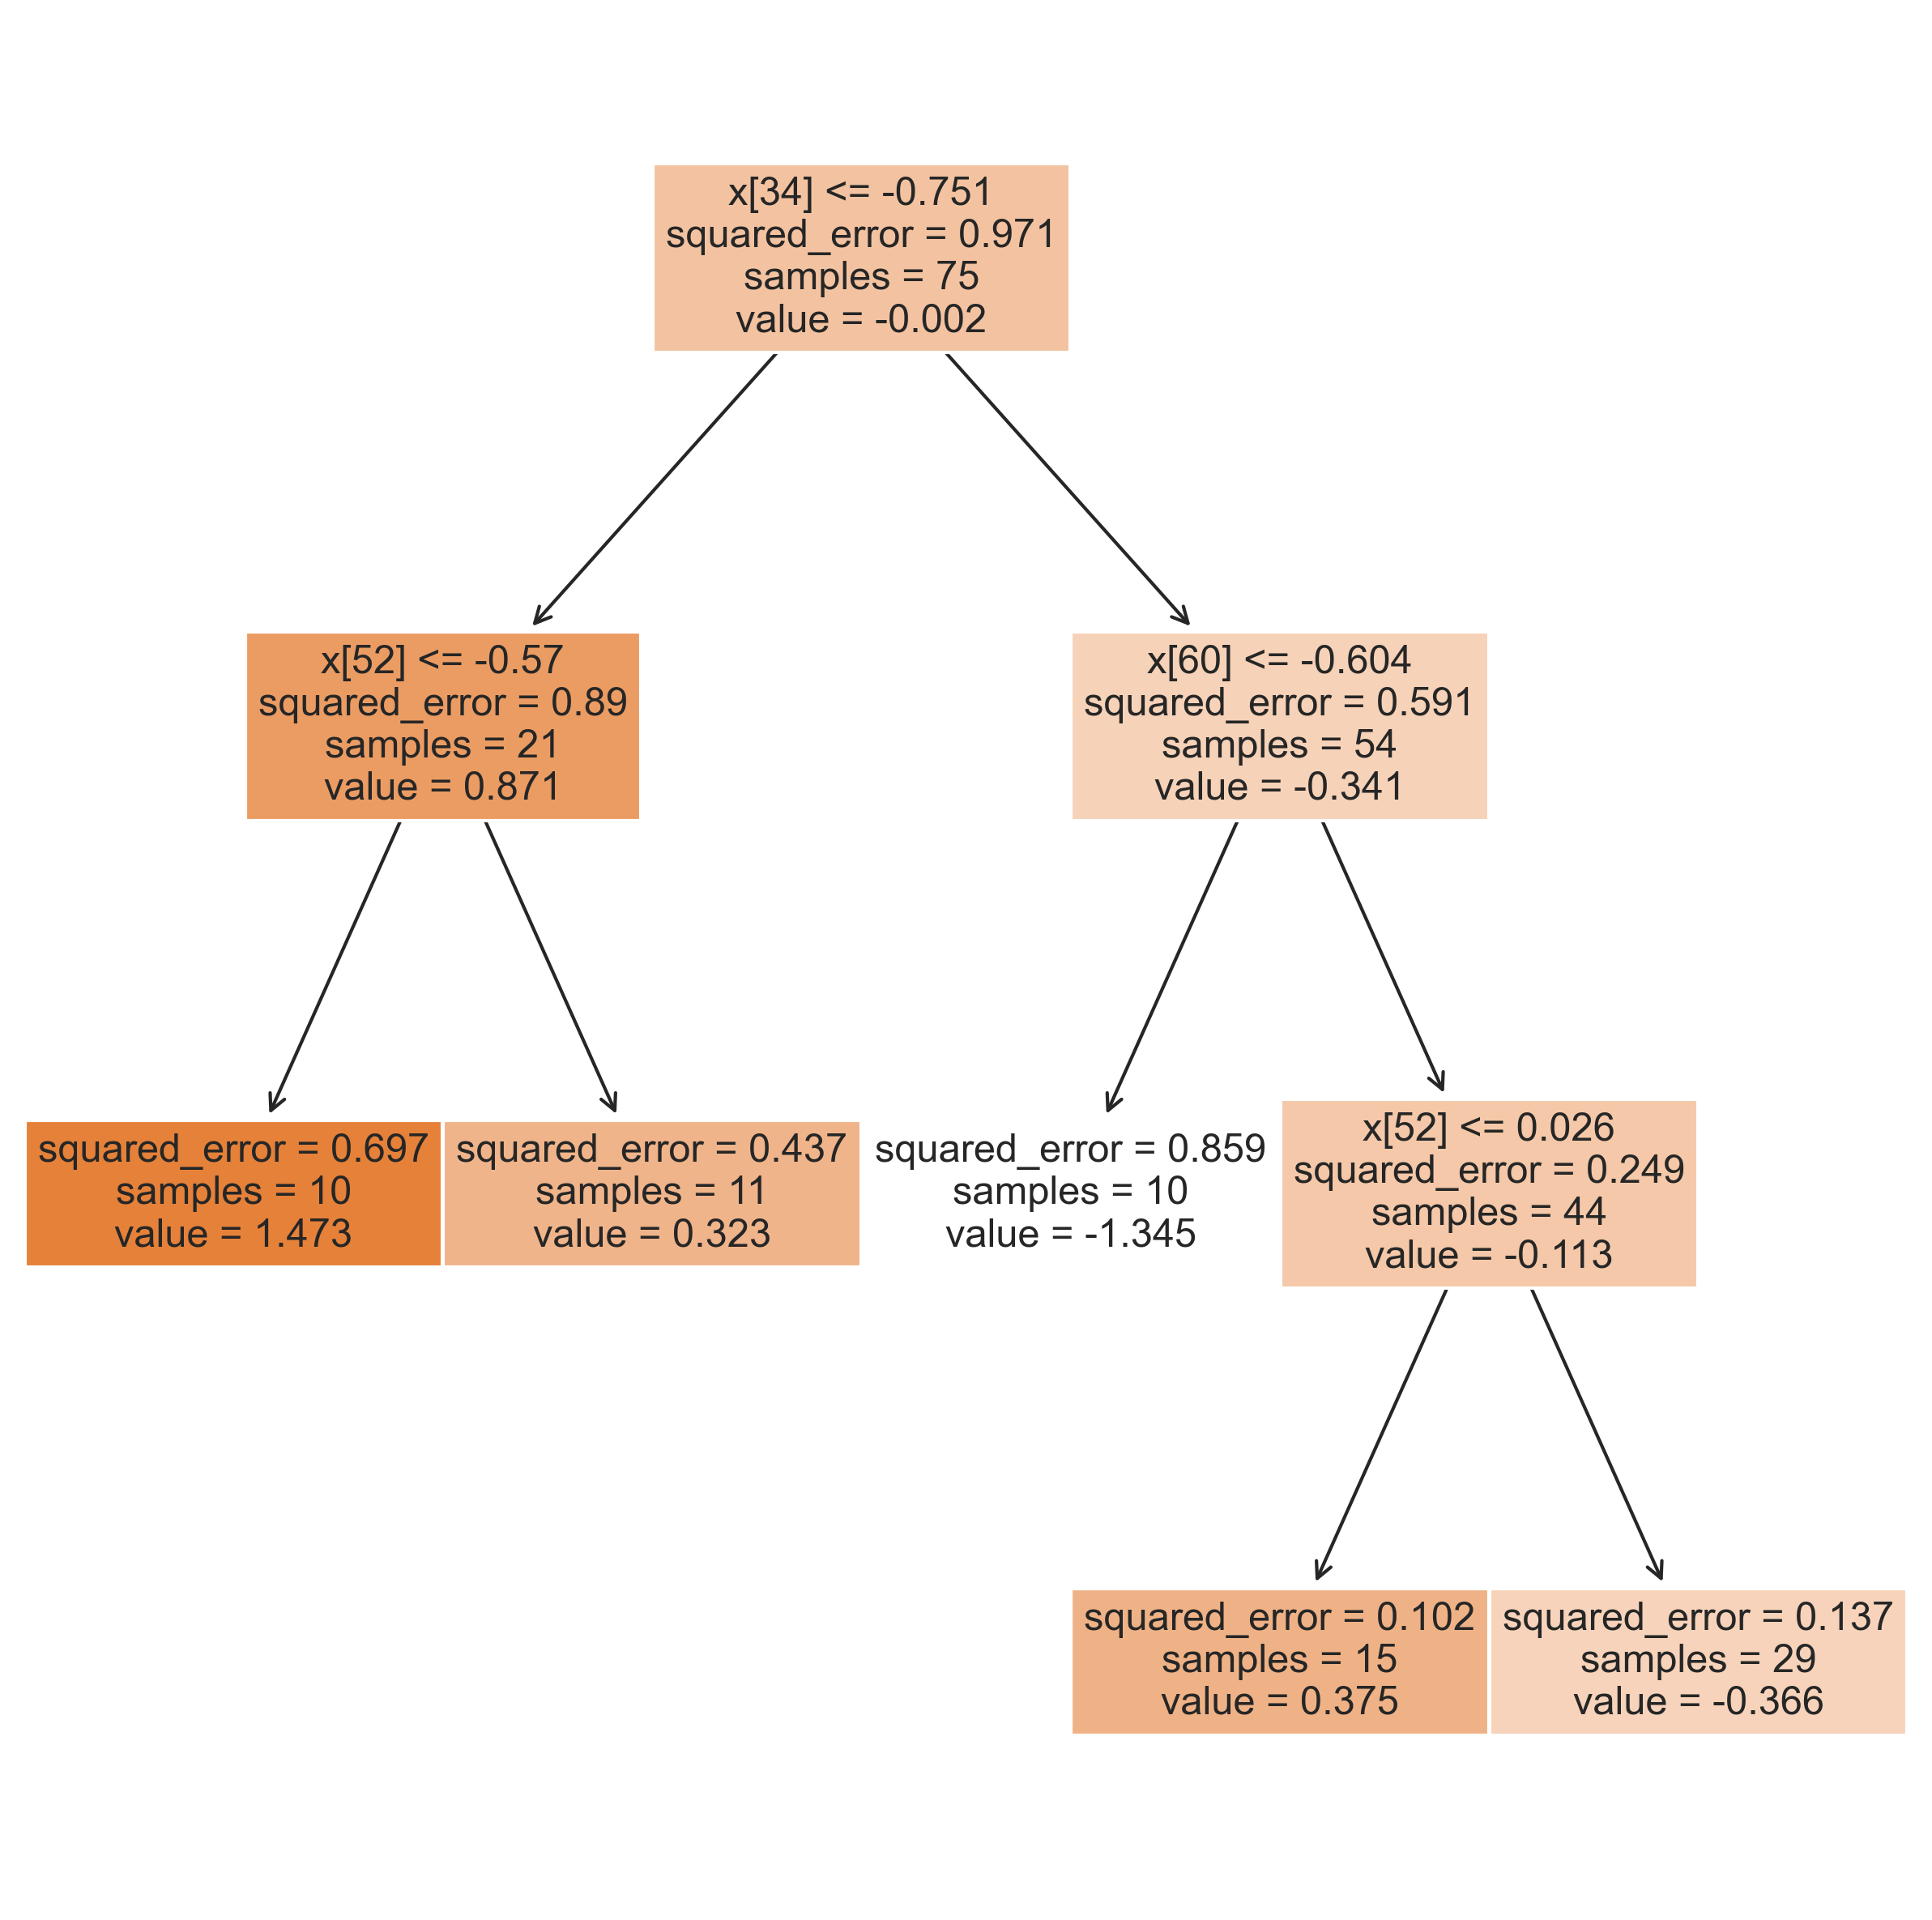

In [31]:
best_tree = cv_grid.best_estimator_
best_tree.fit(X_train_im, Y_train_im)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(best_tree,
               filled = True);

In [32]:
# RMSE in test data
y_pred = best_tree.predict(X_test_im)
rmse_test_cv = np.sqrt(mean_squared_error(Y_test_im, y_pred))
rmse_train_cv = np.sqrt(mean_squared_error(Y_train_im, knn.predict(X_train_im)))
print("Root Mean squared error for train set_cv:",rmse_train_cv)
print("Root Mean squared error for test set_cv:",rmse_test_cv)

Root Mean squared error for train set_cv: 7.605455308989097e-08
Root Mean squared error for test set_cv: 0.8736101264961308


## nested decision tree

In [33]:
dt_ = DecisionTreeRegressor()

cv_in = KFold(n_splits=5, shuffle=True,random_state=42)
cv_out = KFold(n_splits=10, shuffle=True, random_state=42)

nested_dt_grid = GridSearchCV(dt_,param_grid=param_grid,cv=cv_in)

nested_score = -cross_val_score(nested_dt_grid, X_100_im,
                               Y_im,cv=cv_out,scoring='neg_mean_squared_error')

root_nested_score = np.sqrt(nested_score)
root_nested_score_min = np.min(root_nested_score)
print("The best score:",root_nested_score_min)

The best score: 0.387093166017301


# Ridge regression

In [34]:
from sklearn.linear_model import Ridge

r = Ridge(alpha=0.5)
r.fit(X_train_im,Y_train_im)

rmse_train = np.sqrt(mean_squared_error(Y_train_im,r.predict(X_train_im)))
rmse_test = np.sqrt(mean_squared_error(Y_test_im, r.predict(X_test_im)))
print("Root Mean squared error for train set:",rmse_train)
print("Root Mean squared error for test set:",rmse_test)

Root Mean squared error for train set: 0.030880621880837768
Root Mean squared error for test set: 0.8540271769969455


## Ridge regression with GridSearchCV

In [35]:
from sklearn.model_selection import KFold,StratifiedKFold

k=100
lambdas = np.logspace(-4, 4, k) # 10^-4 ~ 10^4

cv = KFold(n_splits=5, shuffle=True, random_state=42)

ridge = Ridge()

param_grid = {
    'alpha' : lambdas
}
ridge_grid = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_im, Y_train_im)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1....
       1.38488637e+02, 1.66810054e+02, 2.00923300e+02, 2.42012826e+02,
       2.91505306e+02, 3.51119173e+02, 4.22924287e+02, 5.09413801e+02,
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04])},
             scoring='neg_mean_squared_error')

In [36]:
ridge_grid.best_estimator_

Ridge(alpha=10.235310218990268)

In [37]:
best_ridge = ridge_grid.best_estimator_

best_ridge.fit(X_train_im, Y_train_im)

ridge_hat = best_ridge.predict(X_test_im)

rmse_ridge = np.sqrt(mean_squared_error(Y_test_im, ridge_hat))
rmse_train_ridge = np.sqrt(mean_squared_error(Y_train_im, best_ridge.predict(X_train_im)))
print("Root Mean squared error for train set cv:",rmse_train_ridge)
print("Root Mean squared error for test set cv:",rmse_ridge)

Root Mean squared error for train set cv: 0.19733647590278874
Root Mean squared error for test set cv: 0.6966174998138309


## Nested ridge

In [38]:
ridge_ = Ridge()

cv_in = KFold(n_splits=5, shuffle=True,random_state=42)
cv_out = KFold(n_splits=10, shuffle=True, random_state=42)

nested_ridge_grid = GridSearchCV(ridge_,param_grid=param_grid,cv=cv_in)

nested_score = -cross_val_score(nested_ridge_grid, X_100_im,
                               Y_im,cv=cv_out,scoring='neg_mean_squared_error')

root_nested_score = np.sqrt(nested_score)
root_nested_score_min = np.min(root_nested_score)
print("The best score:",root_nested_score_min)
mean_r2 = nested_score.mean()
std_r2 = nested_score.std()
print('Nested CV R-squared: {:.2f} +/- {:.2f}'.format(mean_r2, std_r2))

The best score: 0.31580185327810356
Nested CV R-squared: 0.37 +/- 0.19


# R^2 and Standard Deviation in Ridge

In [39]:
# ridge_ = Ridge()

# cv_ = KFold(n_splits=5, shuffle=True, random_state=42)

# nested_ridge_grid = GridSearchCV(ridge_, param_grid=param_grid, cv=cv_)

# nested_ridge_grid.fit(X_100_im, Y_im)

# nested_ridge_scores = cross_val_score(nested_ridge_grid, X_100_im, Y_im, cv=cv_)

# nested_ridge_r2 = nested_ridge_scores.mean()
# nested_ridge_r2_std = nested_ridge_scores.std()

# print("Nested CV R-squared: {:.2f} +/- {:.2f}".format(nested_ridge_r2, nested_ridge_r2_std))


## Showing RMSE graph for Ridge

In [40]:
from sklearn.model_selection import cross_val_score

rmse_res = np.array([])

betas = []

for i in lambdas:
    tmp_ridge = Ridge(alpha=i)
    score = cross_val_score(tmp_ridge,X_100_im,Y,cv=cv,
                             scoring='neg_mean_squared_error')
    # print(score)
    rmse_res = np.append(rmse_res,np.mean(np.sqrt((-score)))) # minus value from cross_val_score
    tmp_ridge.fit(X_100_im,Y)
    betas.append(tmp_ridge.coef_)

In [41]:
betas = np.array(betas)
betas = betas.reshape(100,117) # Because it has (100,1,117) shape
betas.shape

(100, 117)

In [42]:
a = rmse_res
print(np.where(a==rmse_res.min())) # lambda = 14.8

(array([64], dtype=int64),)


In [43]:
lambdas[64]

14.849682622544666

(array([64], dtype=int64),)


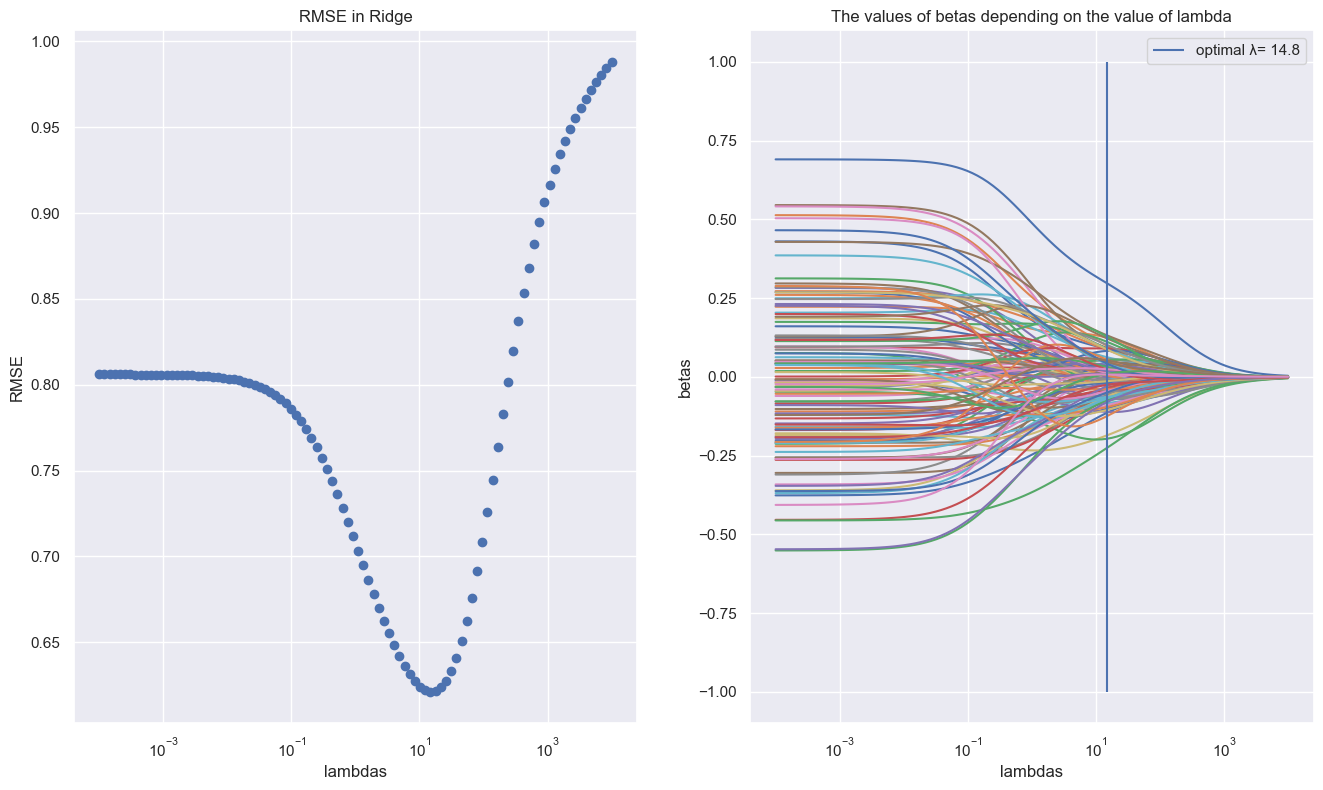

In [44]:
a = rmse_res
print(np.where(a==rmse_res.min()))

fig, ax = plt.subplots(1,2,figsize=(16,9))
ax[0].scatter(lambdas, rmse_res)
ax[0].set_xlabel('lambdas')
ax[0].set_ylabel('RMSE')
ax[0].set_xscale('log')
ax[0].set_title('RMSE in Ridge')

ax[1] = plt.gca()
ax[1].plot(lambdas,betas)
ax[1].vlines(lambdas[64],ymin=-1,ymax=1,label='optimal λ= 14.8')
ax[1].set_xscale('log')
ax[1].set_xlabel('lambdas')
ax[1].set_ylabel('betas')
ax[1].legend()
ax[1].set_title('The values of betas depending on the value of lambda')
plt.show()

# Lasso

In [45]:
from sklearn.linear_model import Lasso

la = Lasso(alpha=0.5)
la.fit(X_train_im,Y_train_im)

rmse_train = np.sqrt(mean_squared_error(Y_train_im,la.predict(X_train_im)))
rmse_test = np.sqrt(mean_squared_error(Y_test_im, la.predict(X_test_im)))
print("Root Mean squared error for train set:",rmse_train)
print("Root Mean squared error for test set:",rmse_test)

Root Mean squared error for train set: 0.9691383993444833
Root Mean squared error for test set: 1.0344747031927222


## Lasso with GridSearchCV

In [46]:
k=100
lambdas = np.logspace(-4, 4, k)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid_lasso = {
    'alpha': lambdas
}

lasso = Lasso()

# grid_lasso = GridSearchCV(lasso,param_grid=param_grid_lasso,
#                           cv=cv, scoring='neg_mean_squared_error')
# grid_lasso.fit(X_train_im,Y_train_im)
with warnings.catch_warnings(): # done to disable all the convergence warnings from elastic net
    warnings.simplefilter("ignore")
    grid_lasso = GridSearchCV(lasso,param_grid=param_grid_lasso,
                          cv=cv, scoring='neg_mean_squared_error')
    grid_lasso.fit(X_train_im,Y_train_im)
grid_lasso.best_estimator_

Lasso(alpha=0.04641588833612782)

In [47]:
best_lasso = grid_lasso.best_estimator_
best_lasso.fit(X_train_im,Y_train_im)

lasso_hat = best_lasso.predict(X_test_im)

lasso_rmse = np.sqrt(mean_squared_error(Y_test_im,lasso_hat))

rmse_train_lasso = np.sqrt(mean_squared_error(Y_train_im, best_lasso.predict(X_train_im)))
print("Root Mean squared error for train set cv:",rmse_train_lasso)
print("Root Mean squared error for test set cv:",lasso_rmse)

Root Mean squared error for train set cv: 0.38055152848628765
Root Mean squared error for test set cv: 0.6933958841484146


## nested Lasso

In [48]:
lasso_ = Lasso()

cv_in = KFold(n_splits=5, shuffle=True,random_state=42)
cv_out = KFold(n_splits=10, shuffle=True, random_state=42)

with warnings.catch_warnings(): # done to disable all the convergence warnings from elastic net
    warnings.simplefilter("ignore")
    nested_lasso_grid = GridSearchCV(lasso_,param_grid=param_grid_lasso,cv=cv_in)
    nested_score = -cross_val_score(nested_lasso_grid, X_100_im,
                               Y_im,cv=cv_out,scoring='neg_mean_squared_error')

root_nested_score = np.sqrt(nested_score)
root_nested_score_min = np.min(root_nested_score)
print("The best score:",root_nested_score_min)
mean_r2 = nested_score.mean()
std_r2 = nested_score.std()
print('Nested CV R-squared: {:.2f} +/- {:.2f}'.format(mean_r2, std_r2))

The best score: 0.33551376023242435
Nested CV R-squared: 0.31 +/- 0.22


# R^2 and Standard Deviation in Lasso

In [49]:
# from sklearn.linear_model import Lasso
# from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# # Define Lasso model and parameter grid
# lasso = Lasso()
# lambdas = np.logspace(-4, 4, k)

# cv = KFold(n_splits=5, shuffle=True, random_state=42)

# param_grid_lasso = {
#     'alpha': lambdas
# }

# # Define nested cross-validation
# cv_outer = KFold(n_splits=5, shuffle=True, random_state=42)
# cv_inner = KFold(n_splits=5, shuffle=True, random_state=42)

# # Perform nested cross-validation with R-squared as the evaluation metric
# with warnings.catch_warnings(): # done to disable all the convergence warnings from elastic net
#     warnings.simplefilter("ignore")
#     nested_lasso_grid = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=cv_inner)
#     nested_scores = cross_val_score(estimator=nested_lasso_grid, X=X_100_im, y=Y_im, cv=cv_outer, scoring='r2')
# # Compute mean and standard deviation of R-squared scores
# mean_r2 = nested_scores.mean()
# std_r2 = nested_scores.std()

# # Print the mean and standard deviation of R-squared scores
# print('Nested CV R-squared: {:.2f} +/- {:.2f}'.format(mean_r2, std_r2))

## Showing RMSE graph for Lasso

In [50]:
from sklearn.model_selection import cross_val_score

rmse_res = np.array([])

betas = []

for i in lambdas:
    with warnings.catch_warnings(): # done to disable all the convergence warnings from elastic net
        warnings.simplefilter("ignore")
        tmp_lasso = Lasso(alpha=i)
        score = cross_val_score(tmp_lasso,X_100_im,Y,cv=cv,
                                 scoring='neg_mean_squared_error')
        rmse_res = np.append(rmse_res,np.mean(np.sqrt((-score)))) # minus value from cross_val_score
        tmp_lasso.fit(X_100_im,Y)
        betas.append(tmp_lasso.coef_)
betas = np.array(betas)
betas = betas.reshape(100,117) # Because it has (100,1,117) shape
betas.shape

(100, 117)

In [51]:
a = rmse_res
print(np.where(a==rmse_res.min())) 

(array([32], dtype=int64),)


In [52]:
lambdas[32] # lambda = 0.039

0.03853528593710531

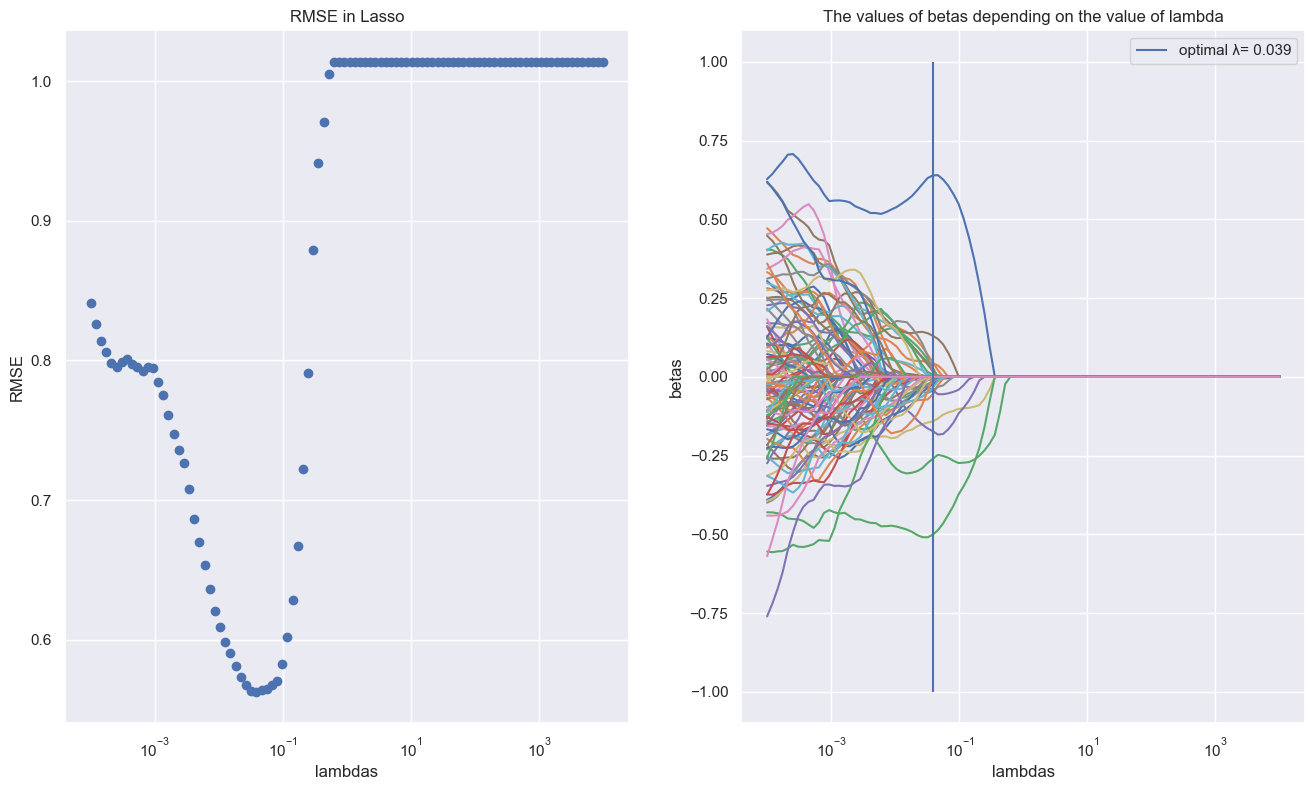

In [53]:
fig, ax = plt.subplots(1,2,figsize=(16,9))
ax[0].scatter(lambdas, rmse_res)
ax[0].set_xlabel('lambdas')
ax[0].set_ylabel('RMSE')
ax[0].set_xscale('log')
ax[0].set_title('RMSE in Lasso')

ax[1] = plt.gca()
ax[1].plot(lambdas,betas)
ax[1].vlines(lambdas[32],ymin=-1,ymax=1,label='optimal λ= 0.039')
ax[1].set_xscale('log')
ax[1].set_xlabel('lambdas')
ax[1].set_ylabel('betas')
ax[1].legend()
ax[1].set_title('The values of betas depending on the value of lambda')
plt.show()

# Elastic Net

In [54]:
from sklearn.linear_model import ElasticNet

ela = ElasticNet(alpha=0.5)
ela.fit(X_train_im,Y_train_im)

rmse_train = np.sqrt(mean_squared_error(Y_train_im,ela.predict(X_train_im)))
rmse_test = np.sqrt(mean_squared_error(Y_test_im, ela.predict(X_test_im)))
print("Root Mean squared error for train set:",rmse_train)
print("Root Mean squared error for test set:",rmse_test)

Root Mean squared error for train set: 0.7772677333580188
Root Mean squared error for test set: 0.8876315384017346


## Elastic Net with GridSearchCV

In [55]:
k=100
lambdas = np.logspace(-4, 4, k)
l1_ratio = np.linspace(0,0.9,10)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

ela = ElasticNet()

param_grid_ela = {
    'alpha':lambdas,
    'l1_ratio':l1_ratio
}
with warnings.catch_warnings(): # done to disable all the convergence warnings from elastic net
    warnings.simplefilter("ignore")
    grid_ela = GridSearchCV(ela,param_grid=param_grid_ela,
                            cv=cv, scoring='neg_mean_squared_error')
    grid_ela.fit(X_train_im, Y_train_im)
grid_ela.best_estimator_

ElasticNet(alpha=0.055908101825122285, l1_ratio=0.9)

In [56]:
best_ela = grid_ela.best_estimator_
best_ela.fit(X_train_im,Y_train_im)

ela_hat = best_ela.predict(X_test_im)

ela_rmse = np.sqrt(mean_squared_error(Y_test_im,ela_hat))

rmse_train_ela = np.sqrt(mean_squared_error(Y_train_im, best_ela.predict(X_train_im)))
print("Root Mean squared error for train set cv:",rmse_train_ela)
print("Root Mean squared error for test set cv:",ela_rmse)

Root Mean squared error for train set cv: 0.3891255771978363
Root Mean squared error for test set cv: 0.6928083038842839


## nested elastic net

In [57]:
ela_ = ElasticNet()

cv_in = KFold(n_splits=5, shuffle=True,random_state=42)
cv_out = KFold(n_splits=10, shuffle=True, random_state=42)
with warnings.catch_warnings(): # done to disable all the convergence warnings from elastic net
    warnings.simplefilter("ignore")
    nested_ela_grid = GridSearchCV(ela_,param_grid=param_grid_ela,cv=cv_in)

    nested_score = -cross_val_score(nested_ela_grid, X_100_im,
                                    Y_im,cv=cv_out,scoring='neg_mean_squared_error')

root_nested_score = np.sqrt(nested_score)
root_nested_score_min = np.min(root_nested_score)
print("The best score:",root_nested_score_min)
mean_r2 = nested_score.mean()
std_r2 = nested_score.std()
print('Nested CV R-squared: {:.2f} +/- {:.2f}'.format(mean_r2, std_r2))

The best score: 0.2987390607413479
Nested CV R-squared: 0.33 +/- 0.23


## Plot for Elastic Net's RMSE 

In [58]:
from sklearn.model_selection import cross_val_score

rmse_res = np.array([])

betas = []

for i in lambdas:
    with warnings.catch_warnings(): # done to disable all the convergence warnings from elastic net
        warnings.simplefilter("ignore")
        tmp_ela = ElasticNet(alpha=i)
        score = cross_val_score(tmp_ela,X_100_im,Y,cv=cv,
                                scoring='neg_mean_squared_error')
        rmse_res = np.append(rmse_res,np.mean(np.sqrt((-score)))) # minus value from cross_val_score
        tmp_ela.fit(X_100_im,Y)
        betas.append(tmp_ela.coef_)
betas = np.array(betas)
betas = betas.reshape(100,117) # Because it has (100,1,117) shape
betas.shape

(100, 117)

In [59]:
a = rmse_res
print(np.where(a==rmse_res.min())) 

(array([34], dtype=int64),)


In [60]:
lambdas[34] # lambda = 0.06

0.055908101825122285

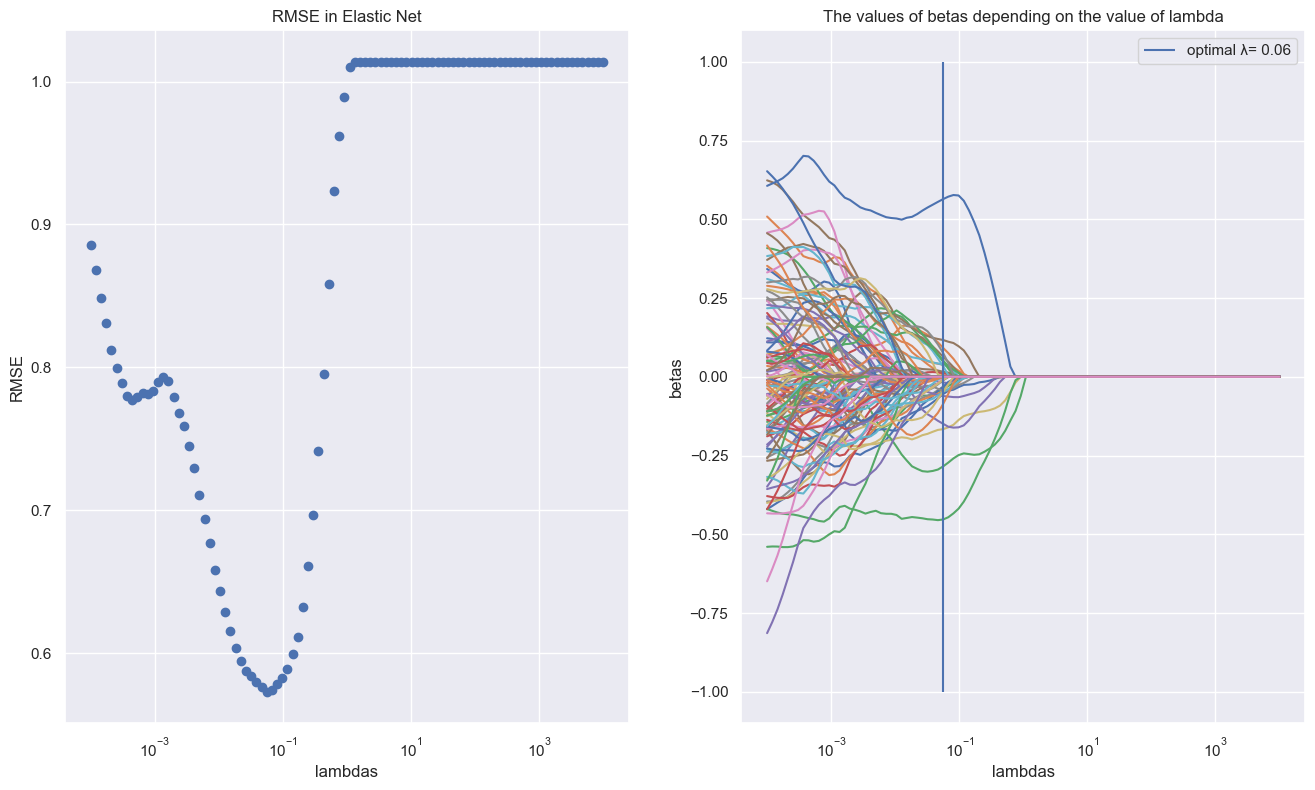

In [61]:
fig, ax = plt.subplots(1,2,figsize=(16,9))
ax[0].scatter(lambdas, rmse_res)
ax[0].set_xlabel('lambdas')
ax[0].set_ylabel('RMSE')
ax[0].set_xscale('log')
ax[0].set_title('RMSE in Elastic Net')

ax[1] = plt.gca()
ax[1].plot(lambdas,betas)
ax[1].vlines(lambdas[34],ymin=-1,ymax=1,label='optimal λ= 0.06')
ax[1].set_xscale('log')
ax[1].set_xlabel('lambdas')
ax[1].set_ylabel('betas')
ax[1].legend()
ax[1].set_title('The values of betas depending on the value of lambda')
plt.show()

# Best Method -> nesed elastic net, make prediction

In [62]:
with warnings.catch_warnings(): # done to disable all the convergence warnings from elastic net
    warnings.simplefilter("ignore")
    nested_ela_grid.fit(X_train_im, Y_train_im)

In [63]:
y_pred = nested_ela_grid.predict(X_new_im)
y_pred

array([ 3.34399705e-01,  8.84591734e-01, -6.95739052e-01,  6.22578833e-01,
        2.34816453e-02,  4.27370149e-01, -8.12474021e-01, -2.65683281e-01,
       -3.30463760e-01,  6.25118487e-01,  3.53601747e-01,  8.69315323e-01,
        1.24052535e-01, -1.85405179e+00,  8.36086393e-01,  9.05862204e-02,
       -1.65716631e-01, -6.15206916e-01, -1.19319415e+00,  8.99644208e-01,
       -4.61368928e-01, -5.71490162e-01,  5.54834151e-01, -1.40688333e+00,
       -1.05684880e+00, -6.44346589e-01,  5.23761963e-01, -1.20096925e-01,
        1.65702180e-01,  2.50222707e-01,  3.85871307e-01, -7.71648403e-01,
       -1.64049525e+00, -1.37146269e+00, -4.02088559e-01, -1.72968853e-02,
       -3.54627330e-01, -1.23389205e-02, -1.15652906e+00,  1.89276442e-01,
        3.01232278e-01,  1.06520385e-01,  1.25624506e+00, -5.88844628e-01,
       -1.69628731e+00,  4.21803811e-02, -2.16676243e-01,  4.30793560e-01,
        8.62858930e-01,  6.02237985e-01,  5.16622250e-01, -9.42666351e-01,
       -5.28918202e-01, -

In [64]:
y_pred = scaler.inverse_transform(y_pred.reshape(-1,1))
y_pred.shape

(1000, 1)

In [65]:
y_pred_df = pd.DataFrame({'y_prediction':y_pred.reshape(1000,)})
y_pred_df

,y_prediction
0,26.656204
1,49.379399
2,-15.889022
3,38.558140
4,13.815138
...,...
995,34.411727
996,-0.968622
997,-41.097844
998,-28.011144


In [66]:
y_pred_df.to_csv('D:/Hyunho Shin - DTU/Spring-2023/computational data analysis/case1/predictions_s222433_s223408.txt',index=False,sep='\t')

In [67]:
Y_im_inv = scaler.inverse_transform(Y_im.reshape(-1,1))

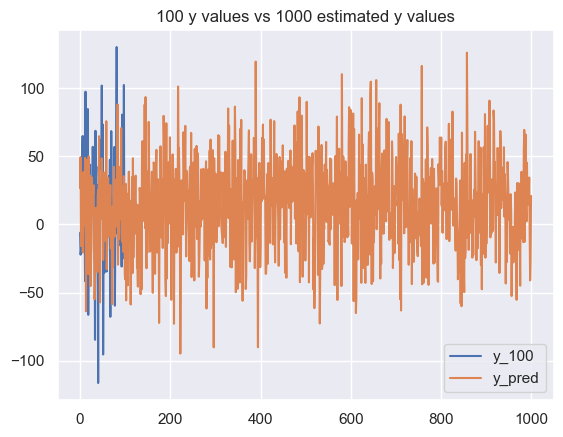

In [68]:
plt.plot(Y_im_inv,label = 'y_100')
plt.plot(y_pred,label='y_pred')
plt.legend()
plt.title('100 y values vs 1000 estimated y values')
plt.show()